<a href="https://colab.research.google.com/github/divyansh1195/Natural-Language-Processing/blob/master/Restaurant%20Reviews/restaurant_reviews_lemma_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Restaurant Reviews Sentiment Analysis using Lemmatizing and TFIDF**

# In this notebook, I have made an attempt to get a simple text classification model up and running. In this, restaurant review data from Kaggle (also available in UCI ML Library) was used to perform Sentiment Analysis using Lemmatizing and TFIDF model to classify reviews into two sentiments — Liked(1) and Disliked(0).

**Since, the data is fairly balanced, we are only concerned with accuracy_score. From various Classifiers, highest accuracy achieved was 80% with cross_val_score of 79.99% with Voting Classifier 6 (# VCLF6).**

# Importing the Libraries and reading the tsv data file

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#title input file is in tsv format
data=pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3) 
#delimeter or sep='\t' 
#quoting =3 no quote or ignore quotes while processing

In [ ]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


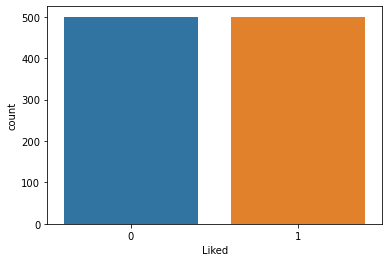

In [ ]:
import seaborn as sns
sns.countplot(x='Liked', data=data)
plt.show()

In [ ]:
good_reviews_count = len(data.loc[data['Liked'] == 1])
bad_reviews_count=len(data.loc[data['Liked']==0])
(good_reviews_count, bad_reviews_count)

(500, 500)

So, the dataset is a balanced dataset with number of '1's and '0's being equal. 

# Data Cleaning

In [ ]:
#Data Cleaning
# Cleaning the Text
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
corpus = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') 
    #remove negative word 'not' as it is closest word to help determine whether the review is good or not 
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow loved place', 'crust not good', 'not tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would not go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place not worth time let alone vega', 'not like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer

# Create a TFIDF Model

In [ ]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

# Train, Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Classifier Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=12)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**1. Logistic Regression**

In [ ]:
#Logistic Regression
lr = LogisticRegression(C=0.7286427728546842, max_iter=2000, solver='lbfgs', random_state=0)
cv = cross_val_score(lr,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred_lr,y_test)*100)
cm=confusion_matrix(y_test, y_pred_lr)
print(cm)
classification_report(y_test, y_pred_lr)

[0.7761194  0.80597015 0.79104478 0.80597015 0.7761194  0.79104478
 0.82089552 0.8358209  0.8030303  0.77272727 0.89393939 0.81818182]
80.75719885421377
The accuracy of the Logistic Regression is 76.5
[[86 11]
 [36 67]]


'              precision    recall  f1-score   support\n\n           0       0.70      0.89      0.79        97\n           1       0.86      0.65      0.74       103\n\n    accuracy                           0.77       200\n   macro avg       0.78      0.77      0.76       200\nweighted avg       0.78      0.77      0.76       200\n'

**2. Naive Bayes**

In [ ]:
#GaussianNB
gnb = GaussianNB(var_smoothing=7)
cv = cross_val_score(gnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_gnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_gnb)
print(cm)
classification_report(y_test, y_pred_gnb)

[0.79104478 0.82089552 0.82089552 0.79104478 0.7761194  0.80597015
 0.7761194  0.82089552 0.74242424 0.74242424 0.87878788 0.84848485]
80.12588572290063
The accuracy of the Naive Bayes is 78.0
[[79 18]
 [26 77]]


'              precision    recall  f1-score   support\n\n           0       0.75      0.81      0.78        97\n           1       0.81      0.75      0.78       103\n\n    accuracy                           0.78       200\n   macro avg       0.78      0.78      0.78       200\nweighted avg       0.78      0.78      0.78       200\n'

In [ ]:
#MultinomialNB
mnb = MultinomialNB(alpha=3)
cv = cross_val_score(mnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_mnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_mnb)
print(cm)
classification_report(y_test, y_pred_mnb)

[0.7761194  0.82089552 0.76119403 0.7761194  0.7761194  0.80597015
 0.7761194  0.82089552 0.77272727 0.72727273 0.86363636 0.84848485]
79.37961706618422
The accuracy of the Naive Bayes is 79.5
[[80 17]
 [24 79]]


'              precision    recall  f1-score   support\n\n           0       0.77      0.82      0.80        97\n           1       0.82      0.77      0.79       103\n\n    accuracy                           0.80       200\n   macro avg       0.80      0.80      0.79       200\nweighted avg       0.80      0.80      0.79       200\n'

In [ ]:
#Bernoulli NB
bnb = BernoulliNB(alpha =6)
cv = cross_val_score(bnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
mnb.fit(X_train,y_train)
y_pred_bnb=mnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_bnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_bnb)
print(cm)
classification_report(y_test, y_pred_bnb)

[0.7761194  0.7761194  0.7761194  0.79104478 0.76119403 0.82089552
 0.79104478 0.82089552 0.72727273 0.75757576 0.95454545 0.86363636]
80.13719282375999
The accuracy of the Naive Bayes is 79.5
[[80 17]
 [24 79]]


'              precision    recall  f1-score   support\n\n           0       0.77      0.82      0.80        97\n           1       0.82      0.77      0.79       103\n\n    accuracy                           0.80       200\n   macro avg       0.80      0.80      0.79       200\nweighted avg       0.80      0.80      0.79       200\n'

**3. Random Forest Classifier**

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=45,
                       max_features='log2', min_samples_leaf=1,
                       n_estimators=1000, random_state=0)
rf.fit(X_train, y_train)
cv = cross_val_score(rf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_rf = rf.predict(X_test)
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_pred_rf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_rf)
print(cm)
classification_report(y_test, y_pred_rf)

[0.79104478 0.82089552 0.74626866 0.7761194  0.71641791 0.82089552
 0.82089552 0.8358209  0.81818182 0.78787879 0.86363636 0.84848485]
80.38783355947534
The accuracy of the RandomForestClassifier is 76.5
[[83 14]
 [33 70]]


'              precision    recall  f1-score   support\n\n           0       0.72      0.86      0.78        97\n           1       0.83      0.68      0.75       103\n\n    accuracy                           0.77       200\n   macro avg       0.77      0.77      0.76       200\nweighted avg       0.78      0.77      0.76       200\n'

**4. SVC**

In [ ]:
#Linear SVC
svcl = SVC(kernel = 'linear', random_state = 0, probability=True)
svcl.fit(X_train, y_train)
cv = cross_val_score(svcl,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_svcl = svcl.predict(X_test)
print('The accuracy of the Linear SVC is',metrics.accuracy_score(y_pred_svcl,y_test)*100)
cm=confusion_matrix(y_test, y_pred_svcl)
print(cm)
classification_report(y_test, y_pred_svcl)

[0.7761194  0.82089552 0.80597015 0.7761194  0.76119403 0.82089552
 0.82089552 0.89552239 0.78787879 0.66666667 0.83333333 0.74242424]
79.23262475501282
The accuracy of the Linear SVC is 79.0
[[85 12]
 [30 73]]


'              precision    recall  f1-score   support\n\n           0       0.74      0.88      0.80        97\n           1       0.86      0.71      0.78       103\n\n    accuracy                           0.79       200\n   macro avg       0.80      0.79      0.79       200\nweighted avg       0.80      0.79      0.79       200\n'

In [ ]:
#rbf SVC
from sklearn.svm import SVC
svck = SVC(kernel = 'rbf', random_state = 0, probability=True, C=0.62)
svck.fit(X_train, y_train)
cv = cross_val_score(svck,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_svck = svck.predict(X_test)
print('The accuracy of the Kernel SVC is',metrics.accuracy_score(y_pred_svck,y_test)*100)
cm=confusion_matrix(y_test, y_pred_svck)
print(cm)
classification_report(y_test, y_pred_svck)

[0.74626866 0.79104478 0.8358209  0.8358209  0.76119403 0.82089552
 0.80597015 0.80597015 0.78787879 0.75757576 0.84848485 0.83333333]
80.25214834916329
The accuracy of the Kernel SVC is 78.5
[[94  3]
 [40 63]]


'              precision    recall  f1-score   support\n\n           0       0.70      0.97      0.81        97\n           1       0.95      0.61      0.75       103\n\n    accuracy                           0.79       200\n   macro avg       0.83      0.79      0.78       200\nweighted avg       0.83      0.79      0.78       200\n'

**5. Decision Tree Classifier**

In [ ]:
#Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0, max_depth=30, min_samples_split=2, min_samples_leaf=1)
dt.fit(X_train, y_train)
cv = cross_val_score(dt,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_dt = dt.predict(X_test)
print('The accuracy of the Decision Tree Classifier is',metrics.accuracy_score(y_pred_dt,y_test)*100)
cm=confusion_matrix(y_test, y_pred_dt)
print(cm)
classification_report(y_test, y_pred_dt)

[0.73134328 0.71641791 0.74626866 0.7761194  0.70149254 0.85074627
 0.79104478 0.73134328 0.74242424 0.72727273 0.8030303  0.75757576]
75.62565958088346
The accuracy of the Decision Tree Classifier is 71.5
[[90  7]
 [50 53]]


'              precision    recall  f1-score   support\n\n           0       0.64      0.93      0.76        97\n           1       0.88      0.51      0.65       103\n\n    accuracy                           0.71       200\n   macro avg       0.76      0.72      0.70       200\nweighted avg       0.77      0.71      0.70       200\n'

**6. KNN**

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2, leaf_size = 10)
knn.fit(X_train, y_train)
cv = cross_val_score(knn,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_knn = knn.predict(X_test)
print('The accuracy of the K-Neighbors Classifier is',metrics.accuracy_score(y_pred_knn,y_test)*100)
cm=confusion_matrix(y_test, y_pred_knn)
print(cm)
classification_report(y_test, y_pred_knn)

[0.71641791 0.79104478 0.65671642 0.68656716 0.67164179 0.74626866
 0.86567164 0.80597015 0.74242424 0.74242424 0.81818182 0.81818182]
75.51258857229006
The accuracy of the K-Neighbors Classifier is 72.5
[[82 15]
 [40 63]]


'              precision    recall  f1-score   support\n\n           0       0.67      0.85      0.75        97\n           1       0.81      0.61      0.70       103\n\n    accuracy                           0.73       200\n   macro avg       0.74      0.73      0.72       200\nweighted avg       0.74      0.72      0.72       200\n'

**Voting Classifier**

Voting is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm.

In [ ]:
#VCLF 1
voting_clf = VotingClassifier(estimators = [('lr', lr),('gnb',gnb),('bnb',bnb),('mnb',mnb),
                                            ('knn',knn),('dt',dt),
                                            ('rf',rf),('svck',svck),('svcl',svcl)], voting = 'soft') 
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('The accuracy of the Voting Classifier is',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print(cm)
classification_report(y_test, y_pred_vclf)

[0.76119403 0.79104478 0.7761194  0.80597015 0.80597015 0.86567164
 0.85074627 0.85074627 0.78787879 0.77272727 0.89393939 0.8030303 ]
81.37532036785768
The accuracy of the Voting Classifier is 78.0
[[87 10]
 [34 69]]


'              precision    recall  f1-score   support\n\n           0       0.72      0.90      0.80        97\n           1       0.87      0.67      0.76       103\n\n    accuracy                           0.78       200\n   macro avg       0.80      0.78      0.78       200\nweighted avg       0.80      0.78      0.78       200\n'

In [ ]:
#VCLF 2
voting_clf = VotingClassifier(estimators = [('lr', lr),('bnb',bnb),('mnb',mnb),('gnb', gnb),
                                            ('rf',rf),('svck',svck),('svcl',svcl)], voting = 'soft') 
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('The accuracy of the Voting Classifier is',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print(cm)
classification_report(y_test, y_pred_vclf)

[0.7761194  0.8358209  0.79104478 0.79104478 0.7761194  0.85074627
 0.80597015 0.82089552 0.8030303  0.71212121 0.89393939 0.8030303 ]
80.49902005125885
The accuracy of the Voting Classifier is 77.0
[[83 14]
 [32 71]]


'              precision    recall  f1-score   support\n\n           0       0.72      0.86      0.78        97\n           1       0.84      0.69      0.76       103\n\n    accuracy                           0.77       200\n   macro avg       0.78      0.77      0.77       200\nweighted avg       0.78      0.77      0.77       200\n'

In [ ]:
#VCLF 3
voting_clf = VotingClassifier(estimators = [('bnb',bnb),('mnb',mnb),('gnb', gnb),
                                            ('svck',svck),('svcl',svcl)], voting = 'soft') 
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('The accuracy of the Voting Classifier is',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print(cm)
classification_report(y_test, y_pred_vclf)

[0.7761194  0.82089552 0.79104478 0.80597015 0.7761194  0.85074627
 0.80597015 0.8358209  0.81818182 0.72727273 0.86363636 0.8030303 ]
80.62339816071157
The accuracy of the Voting Classifier is 78.0
[[83 14]
 [30 73]]


'              precision    recall  f1-score   support\n\n           0       0.73      0.86      0.79        97\n           1       0.84      0.71      0.77       103\n\n    accuracy                           0.78       200\n   macro avg       0.79      0.78      0.78       200\nweighted avg       0.79      0.78      0.78       200\n'

In [ ]:
#VCLF 4
voting_clf = VotingClassifier(estimators = [('lr', lr),('gnb',gnb),('bnb',bnb),('mnb',mnb),
                                            ('knn',knn),('dt',dt),
                                            ('rf',rf),('svck',svck),('svcl',svcl)], voting = 'hard') 
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('The accuracy of the Voting Classifier is',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print(cm)
classification_report(y_test, y_pred_vclf)

[0.7761194  0.82089552 0.7761194  0.79104478 0.7761194  0.82089552
 0.79104478 0.85074627 0.78787879 0.75757576 0.89393939 0.81818182]
80.50467360168852
The accuracy of the Voting Classifier is 77.0
[[87 10]
 [36 67]]


'              precision    recall  f1-score   support\n\n           0       0.71      0.90      0.79        97\n           1       0.87      0.65      0.74       103\n\n    accuracy                           0.77       200\n   macro avg       0.79      0.77      0.77       200\nweighted avg       0.79      0.77      0.77       200\n'

In [ ]:
# VCLF 5
voting_clf = VotingClassifier(estimators = [('lr', lr),('bnb',bnb),('mnb',mnb),('gnb', gnb),
                                            ('rf',rf),('svck',svck),('svcl',svcl)], voting = 'hard') 
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('The accuracy of the Voting Classifier is',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print(cm)
classification_report(y_test, y_pred_vclf)

[0.7761194  0.82089552 0.79104478 0.79104478 0.7761194  0.82089552
 0.79104478 0.85074627 0.77272727 0.74242424 0.89393939 0.81818182]
80.376526458616
The accuracy of the Voting Classifier is 78.0
[[87 10]
 [34 69]]


'              precision    recall  f1-score   support\n\n           0       0.72      0.90      0.80        97\n           1       0.87      0.67      0.76       103\n\n    accuracy                           0.78       200\n   macro avg       0.80      0.78      0.78       200\nweighted avg       0.80      0.78      0.78       200\n'

In [ ]:
# VCLF 6
voting_clf = VotingClassifier(estimators = [('bnb',bnb),('mnb',mnb),('gnb', gnb),
                                            ('svck',svck),('svcl',svcl)], voting = 'hard') 
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('The accuracy of the Voting Classifier is',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print(cm)
classification_report(y_test, y_pred_vclf)

[0.7761194  0.82089552 0.80597015 0.79104478 0.7761194  0.82089552
 0.79104478 0.82089552 0.77272727 0.72727273 0.87878788 0.81818182]
79.99962309663803
The accuracy of the Voting Classifier is 80.0
[[84 13]
 [27 76]]


'              precision    recall  f1-score   support\n\n           0       0.76      0.87      0.81        97\n           1       0.85      0.74      0.79       103\n\n    accuracy                           0.80       200\n   macro avg       0.81      0.80      0.80       200\nweighted avg       0.81      0.80      0.80       200\n'

# Since, the data is fairly balanced, we are only concerned with accuracy_score. From above distinct classifiers and various Voting Classifier combinations, highest accuracy achieved was 80% with cross_val_score of 79.99% with Voting Classifier 6 (# VCLF6).